<a href="https://colab.research.google.com/github/damoon843/Blink-1470/blob/main/scripts/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANT:** access this notebook from Google Drive, not from the 'Open in Colab' feature on Github

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Sound of Music!</b></marquee>

**Drive & Github & Colab Integration Workflow:**
  
  Drive: mount project repo in shared folder to and access files within repo (must keep shared folder directly below 'My Drive')  

  Github: version control scripts and store data  
  
  Colab: use free GPU access provided by Google to define runtime environment

In [2]:
# Mount shared folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
"""
NOTE: only run this once. To run multiple times, Runtime -> Restart runtime
"""
# %cd /content/drive/My Drive/CS1470 Final Project
# !git clone https://github.com/damoon843/Blink-1470.git

"""
NOTE: if the pull command below is causing issues, run the this. Essentially,
this says forget everything on the current working branch and make it the exact 
same as origin/main. You should be able to pull after.
"""
# !git reset --hard origin/main

"""
NOTE: uncomment to pull latest changes from remote repo
"""
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470
!git checkout main
!git pull

"""
NOTE: to push changes, File -> Save as Copy in Github (under 'scripts' folder)
"""

/content/drive/My Drive/CS1470 Final Project/Blink-1470
fatal: Unable to create '/content/drive/My Drive/CS1470 Final Project/Blink-1470/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/damoon843/Blink-1470
   6fddac8..b727a22  main       -> origin/main
Updating 6fddac8..b727a22
error: Unable to create '/content/drive/My Drive/CS1470 Final Project/Blink-1470/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git com

"\nNOTE: to push changes, File -> Save as Copy in Github (under 'scripts' folder)\n"

**Install and load in relevant modules**


In [ ]:
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
# !pip install -U setuptools
# !pip install -r requirements.txt
!pip install librosa==0.8.0
!pip install matplotlib
!pip install playsound
!pip install scipy
!pip install scikit-image
!pip install opencv-python

import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import shuffle

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts


**Preprocess**

In [ ]:
"""
NOTE: run to re-shuffle data
"""
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts

import preprocess

preprocess_data = preprocess.main()

# Save into 'data' folder in Drive
%cd /content/drive/My Drive/CS1470 Final Project/data
np.save('/content/drive/MyDrive/CS1470 Final Project/data/preprocess_data', preprocess_data)

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts


In [ ]:
# Unpack tuples of data
train_data = preprocess_data[0]
train_labels = preprocess_data[1]
validate_data = preprocess_data[2]
validate_labels = preprocess_data[3]
test_data = preprocess_data[4]
test_labels = preprocess_data[5]

# Save preprocess data into 'data' folder in Drive
%cd /content/drive/My Drive/CS1470 Final Project/data

np.save('/content/drive/MyDrive/CS1470 Final Project/data/train_data', train_data)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/train_labels', train_labels)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/validate_data', validate_data)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/validate_labels', validate_labels)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/test_data', test_data)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/test_labels', test_labels)

/content/drive/My Drive/CS1470 Final Project/data


In [ ]:
# Load in preprocess data -> RUN THIS BEFORE RUNNING MODEL
%cd /content/drive/My Drive/CS1470 Final Project/data

train_data = np.load('/content/drive/MyDrive/CS1470 Final Project/data/train_data.npy')
train_labels = np.load('/content/drive/MyDrive/CS1470 Final Project/data/train_labels.npy')

validate_data = np.load('/content/drive/MyDrive/CS1470 Final Project/data/validate_data.npy')
validate_labels = np.load('/content/drive/MyDrive/CS1470 Final Project/data/validate_labels.npy')

test_data = np.load('/content/drive/MyDrive/CS1470 Final Project/data/test_data.npy')
test_labels = np.load('/content/drive/MyDrive/CS1470 Final Project/data/test_labels.npy')

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/data


In [ ]:
"""
NOTE: data must be reshaped to [-1, 128, 128, 1] for convolution
"""
train_data = np.reshape(train_data, (-1, 128, 128, 1))
validate_data = np.reshape(validate_data, (-1, 128, 128, 1))
test_data = np.reshape(test_data, (-1, 128, 128, 1))

In [ ]:
# Validate data shapes

print(f"train data: {train_data.shape}")
print(f"train labels: {train_labels.shape}")
print(f"validate data: {validate_data.shape}")
print(f"validate labels: {validate_labels.shape}")
print(f"test data: {test_data.shape}")
print(f"test labels: {test_labels.shape}")

train data: (8000, 128, 128, 1)
train labels: (8000,)
validate data: (1000, 128, 128, 1)
validate labels: (1000,)
test data: (990, 128, 128, 1)
test labels: (990,)


**Run BasicCNN model**

In [ ]:
# Instantiate the model
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
from base_model import BasicCNN

"""
NOTE: relevant dimensions/sizes for the model
train_data: 8000
validate_data: 1000
test_data: 1000
spectrogram matrix: [128,128]
"""
base_model = BasicCNN()

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts


epoch: 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

batch loss: 2.5273070335388184
batch accuracy: 0.1171875
batch loss: 103.9111557006836
batch accuracy: 0.078125
batch loss: 104.2324447631836
batch accuracy: 0.09375
batch loss: 82.38704681396484
batch accuracy: 0.140625
batch loss: 63.67435836791992
batch accuracy: 0.1171875
batch loss: 52.71302032470703
batch accuracy: 0.0859375
batch loss: 31.798213958740234
batch accuracy: 0.140625
batch loss: 17.4478759765625
batch accuracy: 0.171875
batch loss: 13.57394790649414
batch accuracy: 0.1328125


Text(0, 0.5, 'Loss')

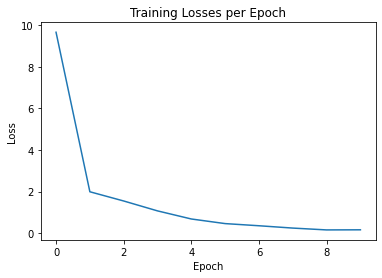

In [ ]:
# Run model on training set
def train(model, train_data, train_labels):
  """ 
  Run through a single epoch on train set
  :return: list of batch losses and average train accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 128
  model.hlayer_sz = 1024

  train_loss = []
  train_accuracy = []
  for start, end in zip(range(0, len(train_data) - bsz, bsz), range(bsz, len(train_data), bsz)):
    batched_train = tf.convert_to_tensor(train_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(train_labels[start:end])

    with tf.GradientTape() as tape:
      logits = model.call(batched_train)
      batch_loss = model.loss_func(logits, batched_labels)
      train_loss.append(batch_loss)
      print(f"batch loss: {batch_loss}")
    
    batch_accuracy = model.accuracy_func(logits, batched_labels)
    train_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

    gradients = tape.gradient(batch_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  
  accuracy = tf.reduce_mean(train_accuracy)
  return train_loss, accuracy

# Call train
# NOTE: training for 10 epochs
epoch_losses = []
epoch_accuracies = []
for i in range(10):
  print(f"epoch: {i}")
  losses, accuracy = train(base_model, train_data, train_labels)
  avg_loss = tf.reduce_mean(losses) # Average losses across all batches
  epoch_losses.append(avg_loss)
  epoch_accuracies.append(accuracy)
  print(f"epoch train accuracy: {accuracy}")
  print(f"epoch average loss: {avg_loss}")

final_accuracy = tf.reduce_mean(epoch_accuracies)
print(f"final accuracy across all epochs: {final_accuracy}")

# Uncomment to visualize train losses
x = [i for i in range(10)]
plt.plot(x, epoch_losses)
plt.title("Training Losses per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

batch accuracy: 0.703125
batch accuracy: 0.71875
batch accuracy: 0.625
batch accuracy: 0.625
batch accuracy: 0.75
batch accuracy: 0.71875
batch accuracy: 0.71875
batch accuracy: 0.6875
batch accuracy: 0.65625
batch accuracy: 0.53125
batch accuracy: 0.640625
batch accuracy: 0.609375
batch accuracy: 0.703125
batch accuracy: 0.671875
batch accuracy: 0.703125
final validation accuracy: 0.6708333492279053


Text(0, 0.5, 'Loss')

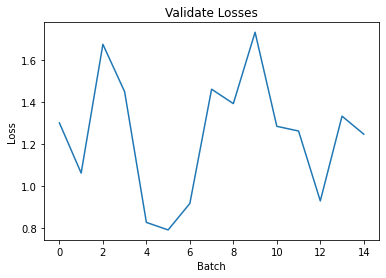

In [ ]:
# Run model on validation set -- treat this as the 'test' set for now

def validate(model, validate_data, validate_labels):
  """
  Run model on validation set and assess accuracy
  :return: list of batch losses and average validation accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  validate_loss = []
  validate_accuracy = []
  for start, end in zip(range(0, len(validate_data) - bsz, bsz), range(bsz, len(validate_data), bsz)):
    batched_validate = tf.convert_to_tensor(validate_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(validate_labels[start:end])

    logits = model.call(batched_validate)
    batch_loss = model.loss_func(logits, batched_labels)
    validate_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    validate_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(validate_accuracy)
  return validate_loss, accuracy

# Call validate
losses, accuracy = validate(base_model, validate_data, validate_labels)
print(f"final validation accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Validate Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")


batch accuracy: 0.59375
batch accuracy: 0.65625
batch accuracy: 0.765625
batch accuracy: 0.71875
batch accuracy: 0.734375
batch accuracy: 0.59375
batch accuracy: 0.75
batch accuracy: 0.6875
batch accuracy: 0.609375
batch accuracy: 0.625
batch accuracy: 0.703125
batch accuracy: 0.734375
batch accuracy: 0.6875
batch accuracy: 0.609375
batch accuracy: 0.765625
final test accuracy: 0.6822916865348816


Text(0, 0.5, 'Loss')

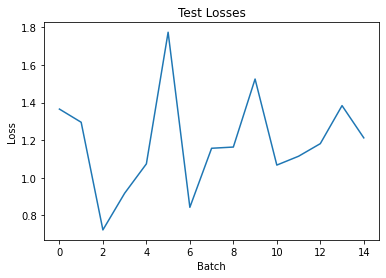

In [ ]:
# Run model on test set and assess test accuracies

def test(model, test_data, test_labels):
  """
  Run model on test set and assess accuracy
  :returns: list of batch losses and average test accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  test_loss = []
  test_accuracy = []
  for start, end in zip(range(0, len(test_data) - bsz, bsz), range(bsz, len(test_data), bsz)):
    batched_test = tf.convert_to_tensor(test_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(test_labels[start:end])

    logits = model.call(batched_test)
    batch_loss = model.loss_func(logits, batched_labels)
    test_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    test_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(test_accuracy)
  return test_loss, accuracy

# Call validate
losses, accuracy = test(base_model, test_data, test_labels)
print(f"final test accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Test Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")

**Run MaskedCNN model**

In [ ]:
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
from masked_model import MaskedCNN

#NOTE: reference masking.py for mask func implementation
mask_model = MaskedCNN(10)

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts


epoch: 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[7, 8, 1, 7, 1, 7, 1, 7, 8, 7, 1, 1, 7, 1, 1, 1, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 1, 1, 1, 7, 7, 1, 1, 7, 7, 1, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 7, 7, 1, 1, 1, 1, 1, 7, 1, 7, 4, 7, 7, 2]
batch loss: 2.437079429626465
batch accuracy: 0.1015625
[7, 4, 8, 7, 1, 7, 1, 9, 8, 3, 1, 1, 7, 1, 1, 1, 7, 7, 7, 7, 7, 1, 7, 7, 4, 0, 4, 1, 1, 1, 1, 7, 7, 1, 1, 7, 7, 1, 1, 7, 1, 1, 1, 1, 7, 4, 1, 1, 7, 7, 7, 7, 1, 1, 1, 1, 1, 4, 1, 7, 4, 6, 3, 3]
batch loss: 28.81283950805664
batch accuracy: 0.1015625
[

Text(0, 0.5, 'Loss')

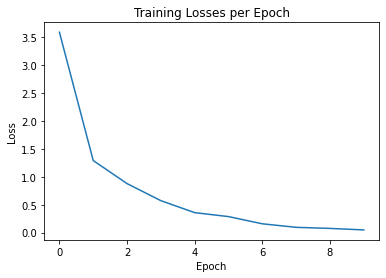

In [ ]:
# Train MaskedCNN model

def train(model, train_data, train_labels):
  """ 
  Run through a single epoch on train set
  :return: list of batch losses and average train accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 128
  model.hlayer_sz = 1024

  train_loss = []
  train_accuracy = []
  for start, end in zip(range(0, len(train_data) - bsz, bsz), range(bsz, len(train_data), bsz)):
    batched_train = tf.convert_to_tensor(train_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(train_labels[start:end])

    with tf.GradientTape() as tape:
      logits, activations, filter_categories  = model.call(batched_train, batched_labels)
      batch_loss = model.loss_func(logits, batched_labels)
      train_loss.append(batch_loss)
      print(f"batch loss: {batch_loss}")
    
    batch_accuracy = model.accuracy_func(logits, batched_labels)
    train_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

    gradients = tape.gradient(batch_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  
  accuracy = tf.reduce_mean(train_accuracy)
  return train_loss, accuracy

# Call train
# NOTE: training for 10 epochs
epoch_losses = []
epoch_accuracies = []
for i in range(10):
  print(f"epoch: {i}")
  losses, accuracy = train(mask_model, train_data, train_labels)
  avg_loss = tf.reduce_mean(losses) # Average losses across all batches
  epoch_losses.append(avg_loss)
  epoch_accuracies.append(accuracy)
  print(f"epoch train accuracy: {accuracy}")
  print(f"epoch average loss: {avg_loss}")

final_accuracy = tf.reduce_mean(epoch_accuracies)
print(f"final accuracy across all epochs: {final_accuracy}")

# Uncomment to visualize train losses
x = [i for i in range(10)]
plt.plot(x, epoch_losses)
plt.title("Training Losses per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

[6, 0, 7, 0, 7, 7, 7, 9, 7, 8, 7, 2, 7, 0, 0, 0, 7, 7, 0, 0, 7, 0, 0, 7, 0, 0, 3, 5, 9, 0, 0, 7, 0, 7, 1, 7, 7, 0, 1, 7, 0, 0, 0, 0, 9, 7, 0, 7, 7, 6, 0, 7, 0, 0, 7, 7, 7, 7, 0, 7, 7, 0, 7, 7]
batch accuracy: 0.6875
[0, 0, 4, 0, 5, 4, 4, 0, 7, 1, 6, 5, 2, 0, 0, 0, 6, 4, 0, 0, 6, 0, 0, 7, 0, 0, 0, 9, 2, 0, 0, 4, 0, 6, 1, 4, 4, 0, 8, 6, 7, 0, 0, 0, 2, 6, 0, 6, 4, 0, 0, 7, 0, 0, 6, 4, 4, 6, 0, 4, 7, 0, 4, 4]
batch accuracy: 0.65625
[7, 0, 7, 0, 4, 4, 7, 3, 7, 5, 7, 5, 7, 0, 5, 0, 6, 4, 0, 0, 7, 0, 0, 7, 0, 0, 0, 5, 3, 0, 0, 7, 0, 4, 0, 7, 7, 0, 1, 7, 3, 7, 0, 0, 3, 7, 0, 7, 4, 4, 0, 3, 0, 0, 7, 7, 7, 7, 0, 7, 3, 1, 3, 0]
batch accuracy: 0.609375
[2, 0, 4, 0, 4, 4, 4, 6, 3, 1, 6, 5, 9, 0, 1, 0, 6, 4, 6, 0, 6, 0, 0, 4, 0, 0, 0, 5, 9, 0, 0, 8, 0, 3, 1, 3, 8, 0, 2, 4, 4, 7, 0, 0, 9, 6, 0, 6, 0, 3, 0, 9, 0, 0, 6, 9, 4, 6, 0, 7, 7, 0, 9, 5]
batch accuracy: 0.65625
[7, 0, 4, 0, 4, 4, 4, 0, 4, 2, 6, 2, 7, 0, 4, 0, 6, 4, 0, 0, 6, 0, 0, 4, 0, 0, 8, 2, 2, 0, 4, 4, 0, 6, 1, 8, 7, 0, 2, 6, 2, 7, 0, 0,

Text(0, 0.5, 'Loss')

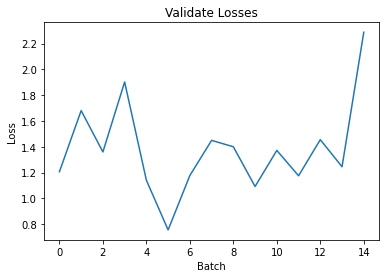

In [ ]:
# Validate MaskedCNN model
def validate(model, validate_data, validate_labels):
  """
  Run model on validation set and assess accuracy
  :return: list of batch losses and average validation accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  validate_loss = []
  validate_accuracy = []
  for start, end in zip(range(0, len(validate_data) - bsz, bsz), range(bsz, len(validate_data), bsz)):
    batched_validate = tf.convert_to_tensor(validate_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(validate_labels[start:end])

    logits, activations, filter_categories  = model.call(batched_validate, batched_labels)
    batch_loss = model.loss_func(logits, batched_labels)
    validate_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    validate_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(validate_accuracy)
  return validate_loss, accuracy

# Call validate
losses, accuracy = validate(mask_model, validate_data, validate_labels)
print(f"final validation accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Validate Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")

[7, 0, 7, 0, 8, 7, 7, 0, 7, 2, 7, 1, 2, 0, 0, 0, 7, 8, 0, 0, 6, 0, 0, 7, 0, 0, 0, 2, 2, 0, 0, 7, 0, 4, 1, 7, 9, 0, 1, 4, 7, 7, 0, 0, 2, 6, 0, 7, 0, 4, 0, 7, 0, 0, 6, 0, 7, 7, 0, 7, 7, 0, 8, 6]
batch accuracy: 0.640625
[4, 0, 4, 0, 4, 4, 4, 4, 7, 2, 7, 8, 6, 0, 1, 0, 3, 8, 0, 0, 7, 0, 0, 7, 0, 0, 8, 5, 3, 0, 0, 7, 4, 3, 5, 9, 7, 0, 1, 7, 7, 7, 7, 4, 3, 7, 0, 7, 4, 4, 0, 3, 0, 0, 7, 7, 7, 7, 0, 4, 7, 8, 7, 8]
batch accuracy: 0.609375


/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts/masked_model.py:116: RuntimeWarning: invalid value encountered in true_divide
  average_activations = sum_activations/np.reshape(num_per_category, (self.num_categories, 1))


[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
batch accuracy: 0.671875
[3, 0, 4, 0, 4, 4, 4, 1, 4, 1, 7, 7, 2, 0, 6, 0, 7, 4, 0, 0, 7, 0, 0, 7, 0, 0, 0, 2, 2, 0, 0, 4, 4, 4, 5, 6, 7, 0, 7, 7, 7, 9, 0, 0, 9, 7, 0, 7, 4, 4, 0, 7, 0, 0, 7, 7, 7, 7, 0, 7, 7, 0, 6, 6]
batch accuracy: 0.765625
[7, 0, 7, 0, 8, 7, 7, 7, 7, 5, 7, 0, 6, 0, 1, 0, 0, 7, 0, 0, 7, 0, 0, 7, 0, 0, 2, 2, 3, 0, 0, 7, 7, 7, 1, 2, 2, 0, 2, 7, 0, 0, 0, 0, 3, 7, 0, 7, 0, 6, 0, 0, 0, 0, 7, 7, 7, 7, 0, 7, 7, 0, 2, 4]
batch accuracy: 0.6875
[0, 0, 7, 0, 7, 7, 7, 6, 7, 5, 9, 5, 2, 0, 0, 0, 9, 7, 0, 0, 9, 0, 0, 7, 0, 0, 2, 2, 6, 0, 0, 4, 7, 4, 1, 6, 7, 0, 2, 4, 7, 7, 0, 0, 9, 9, 0, 9, 7, 7, 0, 9, 0, 0, 9, 3, 7, 9, 0, 4, 7, 0, 7, 4]
batch accuracy: 0.703125
[5, 0, 4, 0, 6, 4, 4, 2, 3, 1, 6, 1, 7, 0, 2, 0, 9, 4, 0, 0, 9, 0, 0, 3, 0, 0, 8, 2, 2, 0, 0, 3, 0, 6, 1, 7, 3, 0, 2, 3, 7, 7, 0, 

Text(0, 0.5, 'Loss')

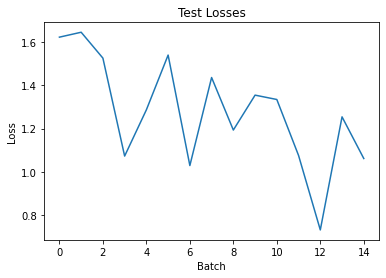

In [ ]:
# Test MaskedCNN model

def test(model, test_data, test_labels):
  """
  Run model on test set and assess accuracy
  :returns: list of batch losses and average test accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  test_loss = []
  test_accuracy = []
  for start, end in zip(range(0, len(test_data) - bsz, bsz), range(bsz, len(test_data), bsz)):
    batched_test = tf.convert_to_tensor(test_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(test_labels[start:end])

    logits, activations, filter_categories  = model.call(batched_test, batched_labels)
    batch_loss = model.loss_func(logits, batched_labels)
    test_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    test_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(test_accuracy)
  return test_loss, accuracy

# Call validate
losses, accuracy = test(mask_model, test_data, test_labels)
print(f"final test accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Test Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")

**Run CAMCNN model**

In [ ]:
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
from CAM_model import CAMCNN

#NOTE: this model implements global avg pooling to generate class activation mappings (CAMs)
class_model = CAMCNN()

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts


In [ ]:
# Train CAMCNN

def train(model, train_data, train_labels):
  """ 
  Run through a single epoch on train set
  :return: list of batch losses and average train accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 128
  model.hlayer_sz = 1024

  train_loss = []
  train_accuracy = []
  for start, end in zip(range(0, len(train_data) - bsz, bsz), range(bsz, len(train_data), bsz)):
    batched_train = tf.convert_to_tensor(train_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(train_labels[start:end])

    with tf.GradientTape() as tape:
      logits = model.call(batched_train)
      batch_loss = model.loss_func(logits, batched_labels)
      train_loss.append(batch_loss)
      print(f"batch loss: {batch_loss}")
    
    batch_accuracy = model.accuracy_func(logits, batched_labels)
    train_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

    gradients = tape.gradient(batch_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  
  accuracy = tf.reduce_mean(train_accuracy)
  return train_loss, accuracy

# Call train
# NOTE: training for 10 epochs
epoch_losses = []
epoch_accuracies = []
for i in range(10):
  print(f"epoch: {i}")
  losses, accuracy = train(class_model, train_data, train_labels)
  avg_loss = tf.reduce_mean(losses) # Average losses across all batches
  epoch_losses.append(avg_loss)
  epoch_accuracies.append(accuracy)
  print(f"epoch train accuracy: {accuracy}")
  print(f"epoch average loss: {avg_loss}")

final_accuracy = tf.reduce_mean(epoch_accuracies)
print(f"final accuracy across all epochs: {final_accuracy}")

# Uncomment to visualize train losses
x = [i for i in range(10)]
plt.plot(x, epoch_losses)
plt.title("Training Losses per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

epoch: 0


(64, 128, 128, 128)
batch accuracy: 0.640625
(64, 128, 128, 128)
batch accuracy: 0.703125
(64, 128, 128, 128)
batch accuracy: 0.609375
(64, 128, 128, 128)
batch accuracy: 0.59375
(64, 128, 128, 128)
batch accuracy: 0.734375
(64, 128, 128, 128)
batch accuracy: 0.75
(64, 128, 128, 128)
batch accuracy: 0.609375
(64, 128, 128, 128)
batch accuracy: 0.734375
(64, 128, 128, 128)
batch accuracy: 0.671875
(64, 128, 128, 128)
batch accuracy: 0.78125
(64, 128, 128, 128)
batch accuracy: 0.65625
(64, 128, 128, 128)
batch accuracy: 0.671875
(64, 128, 128, 128)
batch accuracy: 0.765625
(64, 128, 128, 128)
batch accuracy: 0.671875
(64, 128, 128, 128)
batch accuracy: 0.640625
final validation accuracy: 0.6822916865348816


Text(0, 0.5, 'Loss')

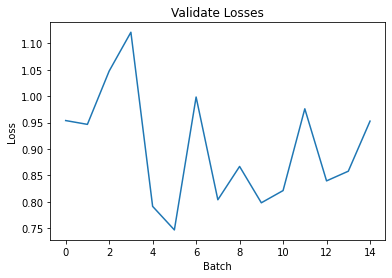

In [ ]:
# Validate CAMCNN 
def validate(model, validate_data, validate_labels):
  """
  Run model on validation set and assess accuracy
  :return: list of batch losses and average validation accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  validate_loss = []
  validate_accuracy = []
  for start, end in zip(range(0, len(validate_data) - bsz, bsz), range(bsz, len(validate_data), bsz)):
    batched_validate = tf.convert_to_tensor(validate_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(validate_labels[start:end])

    logits = model.call(batched_validate)
    batch_loss = model.loss_func(logits, batched_labels)
    validate_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    validate_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(validate_accuracy)
  return validate_loss, accuracy

# Call validate
losses, accuracy = validate(class_model, validate_data, validate_labels)
print(f"final validation accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Validate Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")

(64, 128, 128, 128)
batch accuracy: 0.53125
(64, 128, 128, 128)
batch accuracy: 0.609375
(64, 128, 128, 128)
batch accuracy: 0.71875
(64, 128, 128, 128)
batch accuracy: 0.75
(64, 128, 128, 128)
batch accuracy: 0.734375
(64, 128, 128, 128)
batch accuracy: 0.625
(64, 128, 128, 128)
batch accuracy: 0.6875
(64, 128, 128, 128)
batch accuracy: 0.671875
(64, 128, 128, 128)
batch accuracy: 0.8125
(64, 128, 128, 128)
batch accuracy: 0.71875
(64, 128, 128, 128)
batch accuracy: 0.609375
(64, 128, 128, 128)
batch accuracy: 0.65625
(64, 128, 128, 128)
batch accuracy: 0.734375
(64, 128, 128, 128)
batch accuracy: 0.609375
(64, 128, 128, 128)
batch accuracy: 0.75
final test accuracy: 0.6812499761581421


Text(0, 0.5, 'Loss')

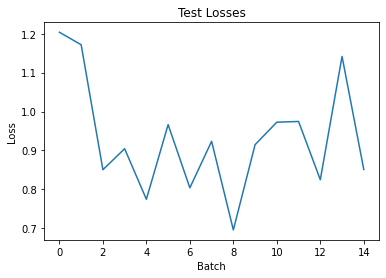

In [ ]:
# Test CAMCNN
def test(model, test_data, test_labels):
  """
  Run model on test set and assess accuracy
  :returns: list of batch losses and average test accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  test_loss = []
  test_accuracy = []
  for start, end in zip(range(0, len(test_data) - bsz, bsz), range(bsz, len(test_data), bsz)):
    batched_test = tf.convert_to_tensor(test_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(test_labels[start:end])
  
    logits = model.call(batched_test)
    batch_loss = model.loss_func(logits, batched_labels)
    test_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    test_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(test_accuracy)
  return test_loss, accuracy

# Call validate
losses, accuracy = test(class_model, test_data, test_labels)
print(f"final test accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Test Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")

**Use CAMCNN model weights to generate CAMs**

In [ ]:
model = CAMCNN()

def train(model, train_data, train_labels):
  """ 
  Run through a single epoch on train set
  :return: list of batch losses and average train accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 128
  model.hlayer_sz = 1024

  train_loss = []
  train_accuracy = []
  for start, end in zip(range(0, len(train_data) - bsz, bsz), range(bsz, len(train_data), bsz)):
    batched_train = tf.convert_to_tensor(train_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(train_labels[start:end])

    with tf.GradientTape() as tape:
      logits = model.call(batched_train)
      batch_loss = model.loss_func(logits, batched_labels)
      train_loss.append(batch_loss)
      print(f"batch loss: {batch_loss}")
    
    batch_accuracy = model.accuracy_func(logits, batched_labels)
    train_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

    gradients = tape.gradient(batch_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  
  accuracy = tf.reduce_mean(train_accuracy)
  return train_loss, accuracy

# Call train
# NOTE: training for 10 epochs
epoch_losses = []
epoch_accuracies = []
for i in range(10):
  print(f"epoch: {i}")
  losses, accuracy = train(model, train_data, train_labels)
  avg_loss = tf.reduce_mean(losses) # Average losses across all batches
  epoch_losses.append(avg_loss)
  epoch_accuracies.append(accuracy)
  print(f"epoch train accuracy: {accuracy}")
  print(f"epoch average loss: {avg_loss}")

final_accuracy = tf.reduce_mean(epoch_accuracies)
print(f"final accuracy across all epochs: {final_accuracy}")

# Save weights
conv1_weights = model.conv1.get_weights()
conv1a_weights = model.conv1a.get_weights()

conv2_weights = model.conv2.get_weights()
conv2a_weights = model.conv2a.get_weights()

conv3_weights = model.conv3.get_weights()
conv3a_weights = model.conv3a.get_weights()

tconv1_weights = model.tconv1.get_weights()

dense1_weights = model.dense1.get_weights()

np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv1_weights', conv1_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv1a_weights', conv1a_weights)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv2_weights', conv2_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv2a_weights', conv2a_weights)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv3_weights', conv3_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv3a_weights', conv3a_weights)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_tconv1_weights', tconv1_weights)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/cam1_dense1_weights', dense1_weights)


# Uncomment to visualize train losses
x = [i for i in range(10)]
plt.plot(x, epoch_losses)
plt.title("Training Losses per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

epoch: 0
(128, 128, 128, 128)
batch loss: 2.310168981552124
batch accuracy: 0.0703125


KeyboardInterrupt: ignored

In [ ]:
# Load in Weights for TrainedCAMCNN (Clara, start here)
conv1_weights, conv1_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv1_weights.npy', allow_pickle = True)
conv1a_weights, conv1a_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv1a_weights.npy', allow_pickle = True)

conv2_weights, conv2_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv2_weights.npy', allow_pickle = True)
conv2a_weights, conv2a_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv2a_weights.npy', allow_pickle = True)

conv3_weights, conv3_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv3_weights.npy', allow_pickle = True)
conv3a_weights, conv3a_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_conv3a_weights.npy', allow_pickle = True)

tconv1_weights, tconv1_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_tconv1_weights.npy', allow_pickle = True)

dense1_weights, dense1_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/cam1_dense1_weights.npy', allow_pickle = True)

In [ ]:
# TrainedCAMCNN Call Function

def callCAMCNN(inputs):
  batch_sz = inputs.shape[0]

  conv1 = tf.nn.conv2d(inputs, conv1_weights, strides = (1,1), padding = "SAME")
  conv1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
  
  conv1a = tf.nn.conv2d(conv1, conv1a_weights, strides = (1,1), padding = "SAME")
  conv1a = tf.nn.relu(tf.nn.bias_add(conv1a, conv1a_bias))

  pool1 = tf.keras.layers.MaxPool2D((2,2), strides=2, padding="SAME")(conv1a)

  conv2 = tf.nn.conv2d(pool1, conv2_weights, strides = (1,1), padding = "SAME")
  conv2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
  
  conv2a = tf.nn.conv2d(conv2, conv2a_weights, strides = (1,1), padding = "SAME")
  conv2a = tf.nn.relu(tf.nn.bias_add(conv2a, conv2a_bias))

  pool2 = tf.keras.layers.MaxPool2D((2,2), strides=1, padding="SAME")(conv2a)

  conv3 = tf.nn.conv2d(pool2, conv3_weights, strides = (1,1), padding = "SAME")
  conv3 = tf.nn.relu(tf.nn.bias_add(conv3, conv3_bias))
  
  conv3a = tf.nn.conv2d(conv3, conv3a_weights, strides = (1,1), padding = "SAME")
  conv3a = tf.nn.relu(tf.nn.bias_add(conv3a, conv3a_bias))

  pool3 = tf.keras.layers.MaxPool2D((2,2), strides=1)(conv3a)
  print(pool3.shape)
  print(tconv1_weights.shape)
  tconv1 = tf.nn.conv2d_transpose(pool3, tconv1_weights, output_shape=(batch_sz, 127, 127, 128), strides = (2,2), padding='VALID', dilations=(1,1))
  tconv1 = tf.nn.relu(tf.nn.bias_add(tconv1, tconv1_bias))

  glob_avg1 = tf.keras.layers.GlobalAveragePooling2D()(tconv1)

  dense1 = tf.linalg.matmul(glob_avg1, dense1_weights) + dense1_bias

  return dense1_weights, tconv1, dense1



(10, 63, 63, 64)
(2, 2, 128, 64)
(128, 10)


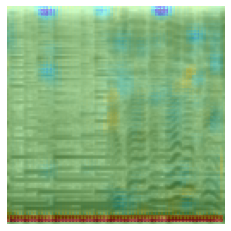

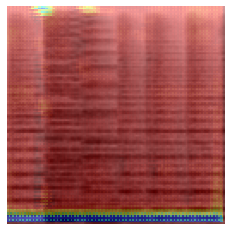

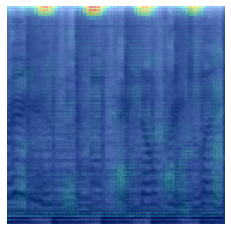

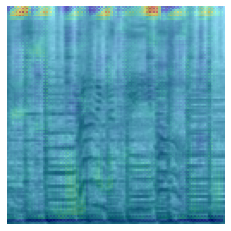

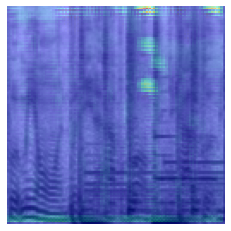

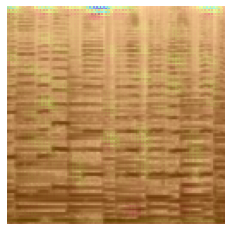

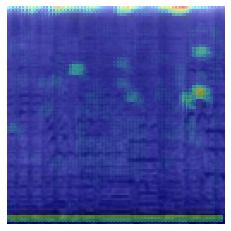

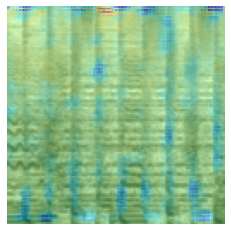

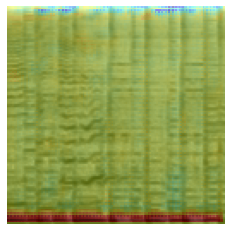

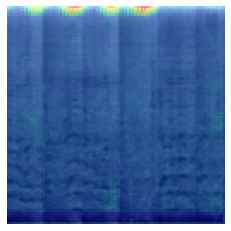

In [ ]:
import librosa
from scipy.io.wavfile import write
# dense1_weights, tconv1, dense1 = callCAMCNN(tf.convert_to_tensor(train_data[0:100]))
# [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
dense1_weights, tconv1, dense1 = callCAMCNN(tf.convert_to_tensor(np.reshape(music_genre, (-1, 128, 128, 1))))

classified_categories = tf.math.argmax(dense1, axis=1)

def generateCAM(weights, filter_outputs, categories):
  CAMS = []

  num_examples = filter_outputs.shape[0]

  np_outputs = filter_outputs.numpy()
  print(weights.shape)
  for i in range(num_examples):
    outputs = filter_outputs[i] 
    coefficients = np.transpose(weights)[categories[i]]
    
    cam = np.sum(outputs*coefficients, axis=2)
    cam = (cam - np.min(cam))/np.ptp(cam)

    mask = np.pad(cam, (0,1), 'constant', constant_values=(0))
    wav = librosa.feature.inverse.mel_to_audio(mask*music_genre[i])
    write('/content/drive/MyDrive/CS1470 Final Project/data/'+genre_name[i]+'_CAM.wav', 22050, wav)

    original = cv2.imread('/content/drive/MyDrive/CS1470 Final Project/data/full_'+genre_name[i]+'.png', cv2.IMREAD_GRAYSCALE)
 
    plt.imshow(original, cmap='gray', vmin = 0, vmax = 255)
    plt.imshow(cam, cmap='jet', interpolation='nearest', alpha = 0.4)
    plt.axis('off')
    plt.show()

    CAMS.append(cam)

  return CAMS

cams = generateCAM(dense1_weights, tconv1, list(range(10)))



**Save and store base_model weights for analysis**

In [ ]:
conv1_weights = model.conv1.get_weights()
# print(conv1_weights[0])
# print(conv1_weights[1])
print(np.shape(conv1_weights[0])) #(3, 3, 1, 32)
print(np.shape(conv1_weights[1])) #(32,)

conv2_weights = model.conv2.get_weights()
# print(conv2_weights[0])
# print(conv2_weights[1])
print(np.shape(conv2_weights[0])) #(3, 3, 32, 64)
print(np.shape(conv2_weights[1])) #(64,)

dense1_weights = model.dense1.get_weights()
# print(dense1_weights[0])
# print(dense1_weights[1])
print(np.shape(dense1_weights[0])) #(65536, 1024)
print(np.shape(dense1_weights[1])) #(1024,)

dense2_weights = model.dense2.get_weights()
# print(dense2_weights[0])
# print(dense2_weights[1])
print(np.shape(dense2_weights[0])) #(1024, 10)
print(np.shape(dense2_weights[1])) #(10,)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/conv1_weights', conv1_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/conv2_weights', conv2_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/dense1_weights', dense1_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/dense2_weights', dense2_weights)

(3, 3, 1, 32)
(32,)
(3, 3, 32, 64)
(64,)
(65536, 1024)
(1024,)
(1024, 10)
(10,)


In [ ]:
# LOAD IN THE MODEL WEIGHTS

%cd /content/drive/My Drive/CS1470 Final Project/data

conv1_weights, conv1_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/conv1_weights.npy', allow_pickle = True)
conv2_weights, conv2_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/conv2_weights.npy', allow_pickle = True)

dense1_weights, dense1_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/dense1_weights.npy', allow_pickle = True)
dense2_weights, dense2_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/dense2_weights.npy', allow_pickle = True)


/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/data


In [ ]:
# RECREATION OF THE MODEL W PRELOADED WEIGHTS

def get_prob(spectrogram):
  input = np.reshape(spectrogram, (-1, 128, 128, 1))

  conv = tf.nn.conv2d(input, conv1_weights, strides = (1,1), padding = "SAME")
  conv = tf.nn.relu(tf.nn.bias_add(conv, conv1_bias))
  activation = conv
  conv = tf.keras.layers.MaxPool2D((2,2), strides=2)(conv)

  conv = tf.nn.conv2d(conv, conv2_weights, strides = (1,1), padding = "SAME")
  conv = tf.nn.relu(tf.nn.bias_add(conv, conv2_bias))
  conv = tf.keras.layers.MaxPool2D((2,2), strides=2)(conv)

  flattened = tf.keras.layers.Flatten()(conv)
  flattened = tf.nn.relu(flattened @ dense1_weights + dense1_bias)
  flattened = flattened @ dense2_weights + dense2_bias
  probs = tf.squeeze(tf.nn.softmax(flattened))

  return probs, tf.math.argmax(probs)

# VERIFY CORRECT PREDICTIONS ON EXAMPLES FOR PRESENTATION
# another one bites the dust
rock, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/rock/rock.00018.wav')
rock = rock[:, 7*128:8*128]
probs, pred = get_prob(rock)
print(pred)

# something bob marley
reggae, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/reggae/reggae.00000.wav')
reggae = reggae[:, :128]
probs, pred = get_prob(reggae)
print(pred)

# hit me baby one more time
pop, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/pop/pop.00019.wav')
pop = pop[:, 6*128:7*128]
probs, pred = get_prob(pop)
print(pred)

# something black sabbath
metal, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/metal/metal.00069.wav')
metal = metal[:, 3*128:4*128]
probs, pred = get_prob(metal)
print(pred)

jazz, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/jazz/jazz.00066.wav')
jazz = jazz[:, 2*128:3*128]
probs, pred = get_prob(jazz)
print(pred)

hiphop, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/hiphop/hiphop.00066.wav')
hiphop = hiphop[:, 2*128:3*128]
probs, pred = get_prob(hiphop)
print(pred)

disco, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/disco/disco.00005.wav')
disco = disco[:, 3*128:4*128]
probs, pred = get_prob(disco)
print(pred)

country, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/country/country.00081.wav')
country = country[:, 3*128:4*128]
probs, pred = get_prob(country)
print(pred)

classical, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/classical/classical.00013.wav')
classical = classical[:, 6*128:7*128]
probs, pred = get_prob(classical)
print(pred)

blues, _, _ = preprocess.wav_to_spectrogram('/content/drive/MyDrive/CS1470 Final Project/Blink-1470/data/blues/blues.00033.wav')
blues = blues[:, 7*128:8*128]
probs, pred = get_prob(blues)
print(pred)


tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
# VISUALIZE AND AURALISE FILTER ACTIVATIONS AFTER FIRST CONV LAYER OF BASIC CNN

layer1_weights = (conv1_weights, conv1_bias)

music_genre = [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
genre_name = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for i in range(10):
  genre = np.reshape(music_genre[i], (-1, 128, 128, 1))
  activation = preprocess.interpret_activation(genre, layer1_weights, 0, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter1_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter1_"+genre_name[i]+".wav")
  activation = preprocess.interpret_activation(genre, layer1_weights, 7, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter8_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter8_"+genre_name[i]+".wav")
  activation = preprocess.interpret_activation(genre, layer1_weights, 15, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter16_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter16_"+genre_name[i]+".wav")
  activation = preprocess.interpret_activation(genre, layer1_weights, 31, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter32_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/conv1_filter32_"+genre_name[i]+".wav")

for i in range(10):
  img = preprocess.spectrogram_img(np.squeeze(music_genre[i]), "/content/drive/MyDrive/CS1470 Final Project/data/full_"+genre_name[i]+".png")

In [ ]:
# VISUALIZE AND AURALISE CONV 2 OUTPUTS OF BASIC CNN
layer2_weights = [(conv1_weights, conv1_bias), (conv2_weights, conv2_bias)]

music_genre = [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
genre_name = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for i in range(10):
  genre = np.reshape(music_genre[i], (-1, 128, 128, 1))
  deconv = preprocess.deconvolve_and_interpret(genre, layer2_weights, "/content/drive/MyDrive/CS1470 Final Project/data/deconv_"+genre_name[i]+".png", "/content/drive/MyDrive/CS1470 Final Project/data/deconv_"+genre_name[i]+".wav")
  print(deconv)

In [ ]:
#SAVE AND STORE THE MODEL WEIGHTS FOR ANALYSIS

conv1_masked_weights = model.conv1.get_weights()
print(np.shape(conv1_masked_weights[0])) #(3, 3, 1, 32)
print(np.shape(conv1_masked_weights[1])) #(32,)

conv2_masked_weights = model.conv2.get_weights()
print(np.shape(conv2_masked_weights[0])) #(3, 3, 32, 64)
print(np.shape(conv2_masked_weights[1])) #(64,)

dense1_masked_weights = model.dense1.get_weights()
print(np.shape(dense1_masked_weights[0])) #(65536, 1024)
print(np.shape(dense1_masked_weights[1])) #(1024,)

dense2_masked_weights = model.dense2.get_weights()
print(np.shape(dense2_masked_weights[0])) #(1024, 10)
print(np.shape(dense2_masked_weights[1])) #(10,)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/conv1_masked_weights', conv1_masked_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/conv2_masked_weights', conv2_masked_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/dense1_masked_weights', dense1_masked_weights)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/dense2_masked_weights', dense2_masked_weights)

(3, 3, 1, 32)
(32,)
(3, 3, 32, 64)
(64,)
(65536, 1024)
(1024,)
(1024, 10)
(10,)


In [ ]:
# LOAD IN THE MODEL WEIGHTS

%cd /content/drive/My Drive/CS1470 Final Project/data

conv1_masked_weights, conv1_masked_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/conv1_masked_weights.npy', allow_pickle = True)
conv2_masked_weights, conv2_masked_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/conv2_masked_weights.npy', allow_pickle = True)

dense1_masked_weights, dense1_masked_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/dense1_masked_weights.npy', allow_pickle = True)
dense2_masked_weights, dense2_masked_bias = np.load('/content/drive/MyDrive/CS1470 Final Project/data/dense2_masked_weights.npy', allow_pickle = True)

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/data


In [ ]:
# VISUALIZE AND AURALISE FOR THE MASKED VERSION OF THE CNN

layer1_weights = (conv1_masked_weights, conv1_masked_bias)
layer2_weights = [(conv1_masked_weights, conv1_masked_bias), (conv2_masked_weights, conv2_masked_bias)]

music_genre = [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
genre_name = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

for i in range(10):
  genre = np.reshape(music_genre[i], (-1, 128, 128, 1))
  activation = preprocess.interpret_activation(genre, layer1_weights, 0, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter1_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter1_"+genre_name[i]+".wav")
  activation = preprocess.interpret_activation(genre, layer1_weights, 7, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter8_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter8_"+genre_name[i]+".wav")
  activation = preprocess.interpret_activation(genre, layer1_weights, 15, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter16_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter16_"+genre_name[i]+".wav")
  activation = preprocess.interpret_activation(genre, layer1_weights, 31, png_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter32_"+genre_name[i]+".png", wav_name = "/content/drive/MyDrive/CS1470 Final Project/data/masked_conv1_filter32_"+genre_name[i]+".wav")

  deconv = preprocess.deconvolve_and_interpret(genre, layer2_weights, "/content/drive/MyDrive/CS1470 Final Project/data/masked_deconv_"+genre_name[i]+".png", "/content/drive/MyDrive/CS1470 Final Project/data/masked_deconv_"+genre_name[i]+".wav")
  print(deconv)


[[ 0.7072395  -0.500288   -0.44323447 ...  0.31355876  0.6905825
   0.6808051 ]
 [ 0.55397284 -0.3213138  -0.29473752 ... -0.4276734   0.34297222
   0.3601276 ]
 [ 0.62415123  0.7654731   1.0754642  ...  0.46071267  1.2824011
   1.4262829 ]
 ...
 [ 1.616523   -0.41154796 -0.8161149  ... -3.4180582  -1.8185917
   1.4177003 ]
 [ 1.489926   -0.53722167 -1.0889571  ... -2.8831327  -1.4105403
   2.169218  ]
 [ 0.04564609 -2.5712395  -2.9215002  ... -3.6248653  -2.533187
   0.5870935 ]]
[[ 0.3602959   0.65593916  0.8402898  ...  0.43927515  0.7981007
   1.0100865 ]
 [ 0.5554554   0.53348315  0.5907692  ... -0.37165427 -0.07772505
   1.2641512 ]
 [ 0.5507829  -0.41310573 -0.6760268  ... -1.2232919  -0.98257244
   1.0567212 ]
 ...
 [ 2.0586095  -0.10623002 -0.51933247 ... -3.2876043  -1.0731103
   2.2780957 ]
 [ 1.7669291   0.14319113 -0.1784994  ... -2.7600234  -0.8472288
   2.609293  ]
 [ 0.1388917  -1.1898938  -1.3187917  ... -3.1248837  -1.8947964
   0.7132194 ]]
[[ 0.80421716  2.2106724  

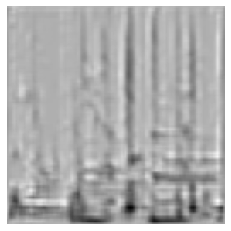

In [ ]:
# EXPERIMENTATION W CREATING HEATMAPS
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

heatmap = cv2.imread('/content/drive/MyDrive/CS1470 Final Project/data/masked_model/masked_deconv_disco.png', cv2.IMREAD_GRAYSCALE)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

original = cv2.imread('/content/drive/MyDrive/CS1470 Final Project/data/masked_model/masked_deconv_hiphop.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(original, cmap='gray', vmin = 0, vmax = 255)
# plt.imshow(heatmap, alpha=0.25)
plt.axis('off')
plt.show()